A predictive Modeling based on Neural Networks for Stocks 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [3]:
# load the stock price data

df = pd.read_csv('TSLA.csv')
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


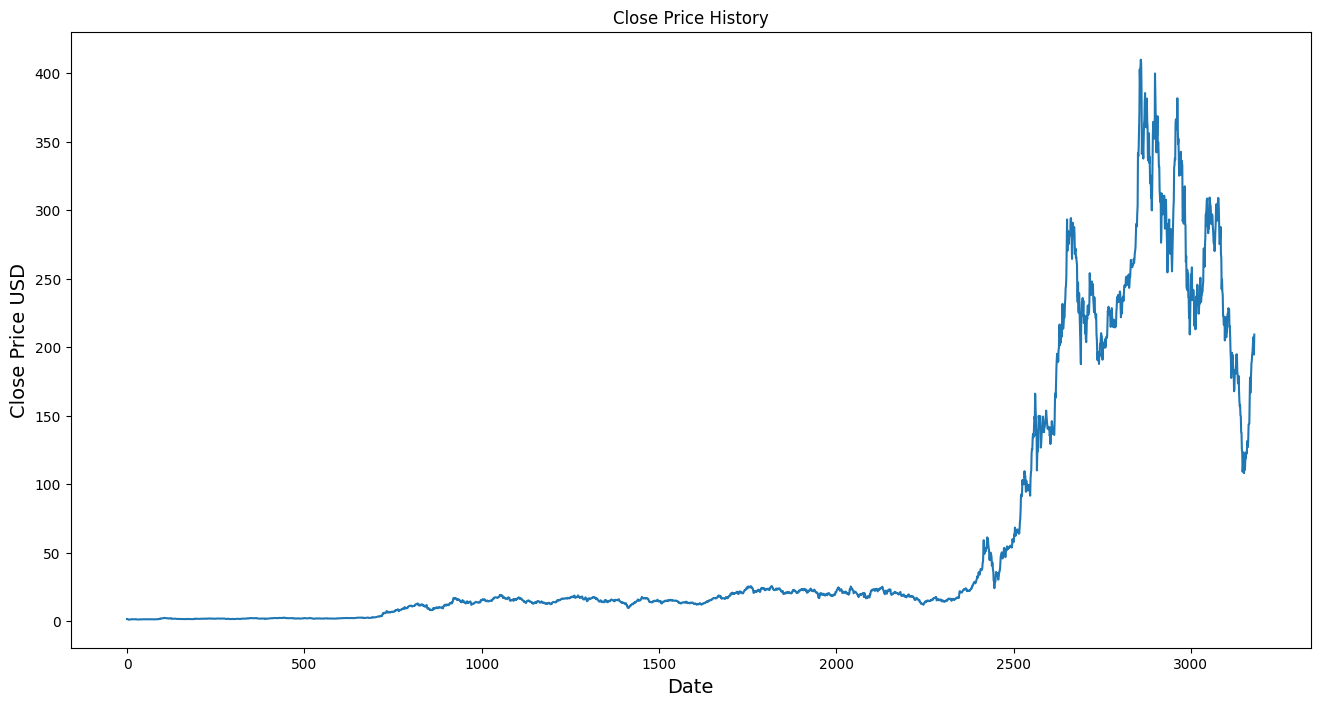

In [4]:
# plot the stock price data

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD', fontsize=14)
plt.show()

In [5]:
# create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
data.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [6]:
# scale the data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [7]:
# split the data into training and testing sets

train_data = scaled_data[0:2000,:]
test_data = scaled_data[2000:,:]


In [8]:
# create the training dataset
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train[:1,:])
#print(x_train)
print(y_train)

[[1.31893376e-03 1.30915182e-03 1.00428041e-03 5.54310983e-04
  5.05408598e-05 0.00000000e+00 2.70634603e-04 2.60852659e-04
  2.03792133e-04 3.81495821e-04 6.58652535e-04 6.66803340e-04
  7.89077642e-04 9.96129608e-04 7.33645810e-04 7.20604033e-04
  8.47769306e-04 8.95047888e-04 8.39618501e-04 7.74404725e-04
  8.02119419e-04 7.41799060e-04 6.74954145e-04 8.34727529e-04
  1.00264927e-03 8.90156916e-04 7.58100670e-04 6.17893619e-04
  6.19524759e-04 5.26596289e-04 3.42368045e-04 2.93458324e-04
  4.10841653e-04 4.85837374e-04 5.46160178e-04 4.84206234e-04
  4.87468513e-04 5.38006927e-04 7.05931117e-04 5.54310983e-04
  6.68434479e-04 6.43979619e-04 6.35826368e-04 6.63543507e-04
  5.99960870e-04 7.58100670e-04 8.57551251e-04 8.55920111e-04
  7.72773586e-04 8.31465251e-04 8.00490725e-04 7.12453228e-04
  8.02119419e-04 8.67333195e-04 1.00754025e-03 8.37987362e-04
  7.22235172e-04 8.57551251e-04 8.10272669e-04 6.63543507e-04]]
[0.000613   0.00070104 0.00077114 ... 0.04488771 0.04951294 0.048957

In [11]:
# create the testing dataset
x_test = []
y_test = data[2000:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)


In [12]:
# create the neural network model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [13]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1940/1940 [==============================] - 37s 18ms/step - loss: 1.7405e-05


In [15]:
# make predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

35/35 [==============================] - 1s 13ms/step


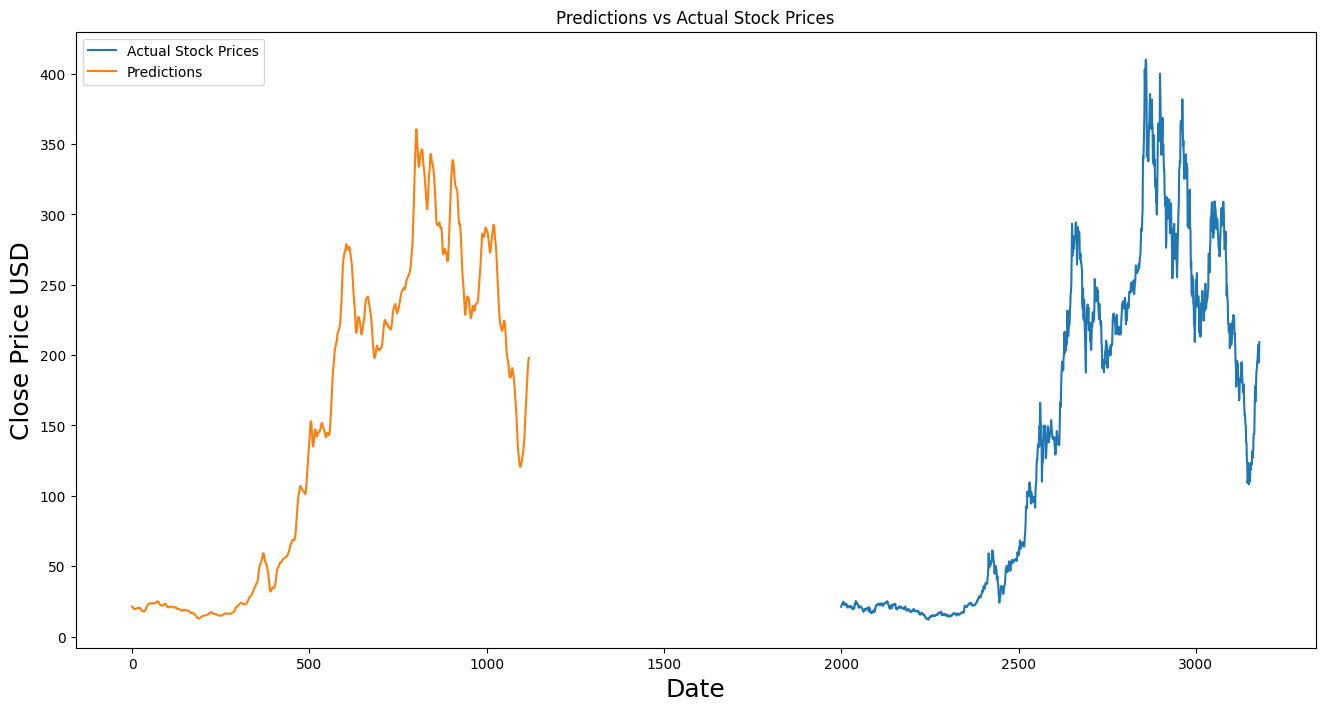

In [16]:
# plot the predictions and the actual stock prices
plt.figure(figsize=(16,8))
plt.title('Predictions vs Actual Stock Prices')
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(predictions, label='Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.legend(loc='upper left')
plt.show()